In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dataset = './armenian_pubs.csv'
data = pd.read_csv(dataset, sep = ',', engine = 'python')

In [4]:
data

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
0,2017/02/25 10:52:03 PM GMT+4,19,Male,100000.0,Student,Station,2000.0,Several times in a month,Environment,Menu,Capital,Nightlife,Hang outs with friends
1,2017/02/25 10:53:19 PM GMT+4,19,Female,50000.0,Student,Calumet,2000.0,rarely (once two week/or a month),Music,Pricing,Capital,Adventure/traveling/exploring,Hang outs with friends
2,2017/02/25 10:54:05 PM GMT+4,20,Male,100000.0,Student,Liberty,3000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
3,2017/02/25 10:55:09 PM GMT+4,18,Male,0.0,Student,Calumet,3000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
4,2017/02/25 10:55:38 PM GMT+4,19,Female,130000.0,Student + working,Liberty,10000.0,rarely (once two week/or a month),Pricing,Environment,Capital,NaN,Hang outs with friends
5,2017/02/25 10:55:39 PM GMT+4,19,Male,90000.0,Student,Station,2000.0,Several times a week,Environment,Menu,Capital,Adventure/traveling/exploring,Hang outs with friends
6,2017/02/25 10:55:41 PM GMT+4,18,Female,0.0,Student,Irish,1000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
7,2017/02/25 10:55:45 PM GMT+4,19,Female,0.0,Student,Station,2000.0,Several times in a month,Environment,Pricing,Capital,"Busy(student life, work)",Hang outs with friends
8,2017/02/25 10:56:17 PM GMT+4,19,Male,80000.0,Student + working,I don't like pubs,10000.0,rarely (once two week/or a month),Environment,Music,Capital,Adventure/traveling/exploring,Hang outs with friends
9,2017/02/25 10:56:45 PM GMT+4,19,Male,150000.0,Student,Irish,3000.0,Several times in a month,Environment,Music,Capital,Nightlife,Hang outs with friends


In [5]:
print(data)

                        Timestamp  Age  Gender    Income          Occupation  \
0    2017/02/25 10:52:03 PM GMT+4    19    Male  100000.0            Student   
1    2017/02/25 10:53:19 PM GMT+4    19  Female   50000.0            Student   
2    2017/02/25 10:54:05 PM GMT+4    20    Male  100000.0            Student   
3    2017/02/25 10:55:09 PM GMT+4    18    Male       0.0            Student   
4    2017/02/25 10:55:38 PM GMT+4    19  Female  130000.0  Student + working   
5    2017/02/25 10:55:39 PM GMT+4    19    Male   90000.0            Student   
6    2017/02/25 10:55:41 PM GMT+4    18  Female       0.0            Student   
7    2017/02/25 10:55:45 PM GMT+4    19  Female       0.0            Student   
8    2017/02/25 10:56:17 PM GMT+4    19    Male   80000.0  Student + working   
9    2017/02/25 10:56:45 PM GMT+4    19    Male  150000.0            Student   
10   2017/02/25 10:56:52 PM GMT+4    20  Female   80000.0            Student   
11   2017/02/25 10:56:56 PM GMT+4    18 

In [6]:
data.head()

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
0,2017/02/25 10:52:03 PM GMT+4,19,Male,100000.0,Student,Station,2000.0,Several times in a month,Environment,Menu,Capital,Nightlife,Hang outs with friends
1,2017/02/25 10:53:19 PM GMT+4,19,Female,50000.0,Student,Calumet,2000.0,rarely (once two week/or a month),Music,Pricing,Capital,Adventure/traveling/exploring,Hang outs with friends
2,2017/02/25 10:54:05 PM GMT+4,20,Male,100000.0,Student,Liberty,3000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
3,2017/02/25 10:55:09 PM GMT+4,18,Male,0.0,Student,Calumet,3000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
4,2017/02/25 10:55:38 PM GMT+4,19,Female,130000.0,Student + working,Liberty,10000.0,rarely (once two week/or a month),Pricing,Environment,Capital,NaN,Hang outs with friends


In [7]:
data.tail()

,Timestamp,Age,Gender,Income,Occupation,Fav_Pub,WTS,Freq,Prim_Imp,Sec_Imp,Stratum,Lifestyle,Occasions
170,2017/03/03 8:50:35 AM GMT+4,19,Female,10000.0,Student,Station,2000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
171,2017/03/03 9:08:33 AM GMT+4,20,Female,0.0,Student,Station,0.0,Several times in a month,Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
172,2017/03/03 8:59:05 PM GMT+4,20,Female,80000.0,Student + working,Tom Collins,5000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
173,2017/03/04 3:32:37 AM GMT+4,19,Male,0.0,Student,Fiction,5500.0,Several times a week,Pricing,Music,Capital,"Rock, punk",Hang outs with friends
174,2017/03/05 9:45:11 PM GMT+4,22,Female,120000.0,Student + working,Beatles,5000.0,Several times in a month,Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends


In [8]:
print(data.columns)

Index(['Timestamp', 'Age ', 'Gender ', 'Income ', ' Occupation', 'Fav_Pub',
       'WTS', 'Freq', 'Prim_Imp', 'Sec_Imp', 'Stratum', 'Lifestyle',
       'Occasions'],
      dtype='object')


In [9]:
data.columns = [u'time', u'age', u'gender', u'income', u'occupation', u'fav_pub',
                   u'wts', u'freq', u'1imp', u'2imp', u'stratum', u'life', u'occasions']

In [10]:
data[['age','gender']].head()

,age,gender
0,19,Male
1,19,Female
2,20,Male
3,18,Male
4,19,Female


In [11]:
data['time'][10:25]

10    2017/02/25 10:56:52 PM GMT+4
11    2017/02/25 10:56:56 PM GMT+4
12    2017/02/25 10:57:00 PM GMT+4
13    2017/02/25 10:57:58 PM GMT+4
14    2017/02/25 10:58:12 PM GMT+4
15    2017/02/25 10:58:19 PM GMT+4
16    2017/02/25 10:59:18 PM GMT+4
17    2017/02/25 10:59:25 PM GMT+4
18    2017/02/25 10:59:28 PM GMT+4
19    2017/02/25 10:59:52 PM GMT+4
20    2017/02/25 10:59:59 PM GMT+4
21    2017/02/25 11:01:22 PM GMT+4
22    2017/02/25 11:02:07 PM GMT+4
23    2017/02/25 11:02:13 PM GMT+4
24    2017/02/25 11:02:28 PM GMT+4
Name: time, dtype: object

In [12]:
type(data['time'][36])

str

Data analysis

In [13]:
data.describe()

,age,income,wts
count,175.000000,1.740000e+02,172.000000
mean,19.548571,1.101977e+05,4831.395349
std,2.770262,3.576027e+05,4323.951020
min,16.000000,0.000000e+00,0.000000
25%,18.000000,1.000000e+02,2000.000000
50%,19.000000,5.500000e+04,4000.000000
75%,20.000000,1.000000e+05,5000.000000
max,41.000000,4.500000e+06,30000.000000


In [14]:
data.corr()

,age,income,wts
age,1.000000,0.163399,0.134111
income,0.163399,1.000000,0.228340
wts,0.134111,0.228340,1.000000


Here we seen correlation between age and income

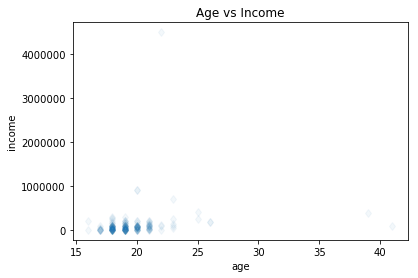

In [15]:
plt.plot(data['age'], data['income'], 'd', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('income')
plt.title('Age vs Income')
pass

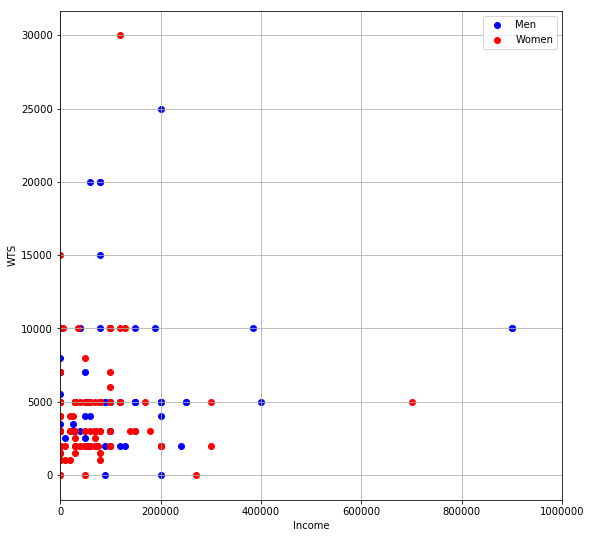

In [16]:
plt.figure(figsize = (9, 9))
plt.scatter(data[data['gender'] == 'Male']['income'],
            data[data['gender'] == 'Male']['wts'],
            alpha = 1,
            label = "Men",
            color = 'blue')

plt.scatter(data[data['gender'] == 'Female']['income'],
            data[data['gender'] == 'Female']['wts'],
            alpha = 1,
            label = "Women",
            color = 'red')

plt.xlabel('Income')
plt.ylabel('WTS')
plt.legend()
plt.xlim(0,1000000)
plt.grid()

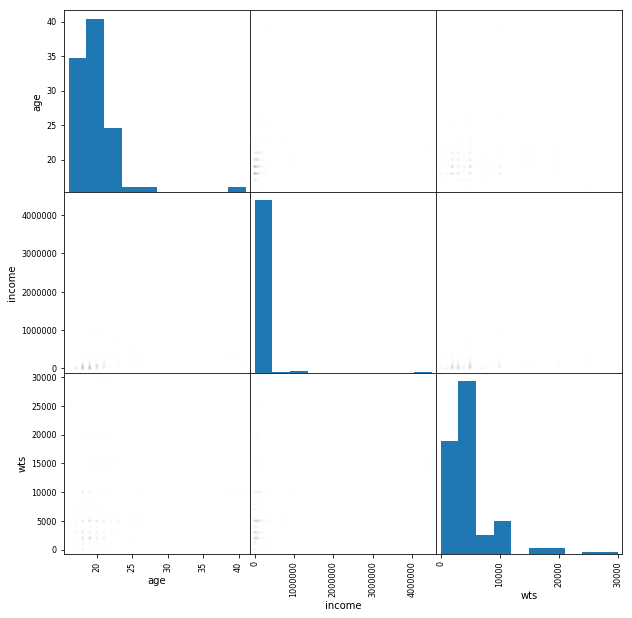

In [17]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

Preparing data

In [18]:
data.count(axis = 0)

time          175
age           175
gender        175
income        174
occupation    175
fav_pub       168
wts           172
freq          175
1imp          175
2imp          175
stratum       175
life          169
occasions     173
dtype: int64

In [19]:
mean_income = data['income'].mean(axis = 0) 
data['income'] =list(map(lambda x: mean_income if np.isnan(data['income'][x])
                        else data['income'][x],range(len(data['income']))))

In [20]:
mean_wts = data['wts'].mean(axis = 0) 
data['wts'] = list(map(lambda x: mean_income if np.isnan(data['wts'][x])
                        else data['wts'][x],range(len(data['wts']))))

In [21]:
data_gender = pd.get_dummies(data['gender'])
data=data.drop(['gender'], axis = 1)
data=data.join(data_gender)

In [22]:
data['freq'].unique()

array(['Several times in a month', 'rarely (once two week/or a month)',
       'Several times a week'], dtype=object)

In [23]:
data_freq = pd.get_dummies(data['freq'])
data=data.drop(['freq'], axis = 1)
data=data.join(data_freq)

In [24]:
data['1imp'].unique()

array(['Environment', 'Music', 'Pricing', 'Menu'], dtype=object)

In [25]:
data_1imp = pd.get_dummies(data['1imp'])
data=data.drop(['1imp'], axis = 1)
data=data.join(data_1imp)

In [26]:
data['stratum'].unique()

array(['Capital', 'Urban', 'Rural'], dtype=object)

In [27]:
data_stratum = pd.get_dummies(data['stratum'])
data=data.drop(['stratum'], axis = 1)
data = data.join(data_stratum)

In [28]:
data['occasions'].unique()

array(['Hang outs with friends', 'Special events/parties', 'Birthdays',
       'Never', 'chem aycelum', 'Nowere', nan, 'For listening  good music '], dtype=object)

In [29]:
data_occasions = pd.get_dummies(data['occasions'])
data=data.drop(['occasions'], axis = 1)
data=data.join(data_occasions)

In [30]:
data['occupation'].unique()

array(['Student', 'Student + working', 'Working', 'CEO',
       'Entrepreneur / Software Engineer', 'army', 'Working '], dtype=object)

In [31]:
data_occupation = pd.get_dummies(data['occupation'])
data=data.drop(['occupation'], axis = 1)
data=data.join(data_occupation)

In [32]:
data['fav_pub'].unique()

array(['Station', 'Calumet', 'Liberty', 'Irish', "I don't like pubs",
       'Venue', 'VOID', 'DAS', '37 pub', 'Venue ', 'Cantaloupe', nan,
       'Tom Collins ', 'Bulldog', 'Pepper', 'Eden', 'Liberty ',
       'Hemingway', 'Void', 'I have none', 'Pub 37', 'Red bull', 'Varonna',
       'Barcode', 'Paparazzi ', 'Pechenu bagher', 'Dargett', 'Pub 007',
       'Do not have one', 'kaptyorka', 'DAS ', 'Paulaner', 'Wild west',
       'BullDog', 'Tom collins', "Bob's", 'Fiction', 'Tom Collins',
       'The beatles', 'Ulixanyan art club', 'Simona', 'Speak Easy ',
       'Beer Academy', 'Yankee', 'Beatles'], dtype=object)

In [33]:
data['fav_pub']=map(lambda s: str(s).lower().strip(),[data['fav_pub'][i] for i in range(len(data['fav_pub']))])

In [34]:
data_fav_pub = pd.get_dummies(data['fav_pub'])
data=data.drop(['fav_pub'], axis = 1)
data =data.join(data_fav_pub)

In [35]:
data=data.drop(['2imp'], axis = 1)\
            .drop(['life'], axis = 1)\
                .drop(['time'], axis = 1)

In [36]:
data

,age,income,wts,Female,Male,Several times a week,Several times in a month,rarely (once two week/or a month),Environment,Menu,...,Special events/parties,chem aycelum,CEO,Entrepreneur / Software Engineer,Student,Student + working,Working,Working,army,
0,19,100000.0,2000.000000,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,19,50000.0,2000.000000,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,20,100000.0,3000.000000,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,18,0.0,3000.000000,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,19,130000.0,10000.000000,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
5,19,90000.0,2000.000000,0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6,18,0.0,1000.000000,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
7,19,0.0,2000.000000,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8,19,80000.0,10000.000000,0,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
9,19,150000.0,3000.000000,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
data.median(axis = 0)

age                                      19.0
income                                55000.0
wts                                    4000.0
Female                                    1.0
Male                                      0.0
Several times a week                      0.0
Several times in a month                  0.0
rarely (once two week/or a month)         1.0
Environment                               1.0
Menu                                      0.0
Music                                     0.0
Pricing                                   0.0
Capital                                   1.0
Rural                                     0.0
Urban                                     0.0
Birthdays                                 0.0
For listening  good music                 0.0
Hang outs with friends                    1.0
Never                                     0.0
Nowere                                    0.0
Special events/parties                    0.0
chem aycelum                      

In [38]:
data['income'] = (data['income']-data['income'].mean(axis = 0))/data['income'].std(axis = 0)
data['wts'] = (data['wts']-data['wts'].mean(axis = 0))/data['wts'].std(axis = 0)

In [39]:
data=data.drop(data[data['income']>5*data['income'].std(axis = 0)].index)
data=data.drop(data[data['wts']>5*data['wts'].std(axis = 0)].index)

knn

In [40]:
x = data.drop('Female', axis = 1)
y = data['Female']
x = x.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)
data.count()

age                                   171
income                                171
wts                                   171
Female                                171
Male                                  171
Several times a week                  171
Several times in a month              171
rarely (once two week/or a month)     171
Environment                           171
Menu                                  171
Music                                 171
Pricing                               171
Capital                               171
Rural                                 171
Urban                                 171
Birthdays                             171
For listening  good music             171
Hang outs with friends                171
Never                                 171
Nowere                                171
Special events/parties                171
chem aycelum                          171
CEO                                   171
Entrepreneur / Software Engineer  

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 33)

size_train, _ = x_train.shape 
size_test,  _ = x_test.shape 

print(size_test, size_train)

52 119


In [42]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
y_train_predict = knn.predict(x_train)
y_test_predict = knn.predict(x_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.0576923076923


In [44]:
from sklearn.model_selection import GridSearchCV
k = range(1,20)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': k}, cv=10)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_k = grid.best_estimator_.n_neighbors
print(best_cv_err, best_k)

0.0756302521008 16


best is the 16 neighbors with 7% err

In [45]:
knn = KNeighborsClassifier(n_neighbors = best_k).fit(x_train, y_train)

err_train = np.mean(y_train != knn.predict(x_train))
err_test  = np.mean(y_test  != knn.predict(x_test))

print(err_train, err_test)

0.0672268907563 0.134615384615


Tree

In [46]:
filename = './armenian_pubs.csv'
dataset = pd.read_csv(filename, sep = ',', engine = 'python')
dataset.columns = [u'time', u'age', u'gender', u'income', u'occupation', u'fav_pub',
                   u'wts', u'freq', u'1imp', u'2imp', u'stratum', u'life', u'occasions']
dataset

,time,age,gender,income,occupation,fav_pub,wts,freq,1imp,2imp,stratum,life,occasions
0,2017/02/25 10:52:03 PM GMT+4,19,Male,100000.0,Student,Station,2000.0,Several times in a month,Environment,Menu,Capital,Nightlife,Hang outs with friends
1,2017/02/25 10:53:19 PM GMT+4,19,Female,50000.0,Student,Calumet,2000.0,rarely (once two week/or a month),Music,Pricing,Capital,Adventure/traveling/exploring,Hang outs with friends
2,2017/02/25 10:54:05 PM GMT+4,20,Male,100000.0,Student,Liberty,3000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
3,2017/02/25 10:55:09 PM GMT+4,18,Male,0.0,Student,Calumet,3000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
4,2017/02/25 10:55:38 PM GMT+4,19,Female,130000.0,Student + working,Liberty,10000.0,rarely (once two week/or a month),Pricing,Environment,Capital,NaN,Hang outs with friends
5,2017/02/25 10:55:39 PM GMT+4,19,Male,90000.0,Student,Station,2000.0,Several times a week,Environment,Menu,Capital,Adventure/traveling/exploring,Hang outs with friends
6,2017/02/25 10:55:41 PM GMT+4,18,Female,0.0,Student,Irish,1000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
7,2017/02/25 10:55:45 PM GMT+4,19,Female,0.0,Student,Station,2000.0,Several times in a month,Environment,Pricing,Capital,"Busy(student life, work)",Hang outs with friends
8,2017/02/25 10:56:17 PM GMT+4,19,Male,80000.0,Student + working,I don't like pubs,10000.0,rarely (once two week/or a month),Environment,Music,Capital,Adventure/traveling/exploring,Hang outs with friends
9,2017/02/25 10:56:45 PM GMT+4,19,Male,150000.0,Student,Irish,3000.0,Several times in a month,Environment,Music,Capital,Nightlife,Hang outs with friends


In [47]:
dataset = dataset.drop(['time'],axis = 1)
dataset = dataset.drop(['life'], axis = 1)
dataset = dataset.drop(['fav_pub'], axis = 1)
dataset = dataset.drop(['2imp'], axis = 1)
dataset = dataset.drop(['occasions'],axis = 1)

In [48]:
mean_income = dataset['income'].mean(axis = 0) 
dataset['income'] = list(map(lambda x: mean_income if np.isnan(dataset['income'][x]) else dataset['income'][x],range(len(dataset['income']))))
mean_wts = dataset['wts'].mean(axis = 0) 
dataset['wts'] = list(map(lambda x: mean_income if np.isnan(dataset['wts'][x]) else dataset['wts'][x],range(len(dataset['wts']))))

In [49]:
dataset['freq'] = list(map(lambda x: 3 if x=='Several times a week' else x,dataset['freq']))
dataset['freq'] = list(map(lambda x: 2 if x=='Several times in a month' else x,dataset['freq']))
dataset['freq'] = list(map(lambda x: 1 if x=='rarely (once two week/or a month)' else x,dataset['freq']))
dataset['stratum'] =list( map(lambda x: 1 if x=='Capital' else x,dataset['stratum']))
dataset['stratum'] =list( map(lambda x: 2 if x=='Urban' else x,dataset['stratum']))
dataset['stratum'] = list(map(lambda x: 3 if x=='Rural' else x,dataset['stratum']))
dataset['1imp'] = list(map(lambda x: 1 if x=='Environment' else x,dataset['1imp']))
dataset['1imp'] = list(map(lambda x: 2 if x=='Music' else x,dataset['1imp']))
dataset['1imp'] =list( map(lambda x: 3 if x=='Pricing' else x,dataset['1imp']))
dataset['1imp'] = list(map(lambda x: 4 if x=='Menu' else x,dataset['1imp']))
i=-1
for x in dataset['occupation'][:]:
    i += 1
    if x == 'Student':
        dataset['occupation'][i]=1
    elif x == 'Student + working':
        dataset['occupation'][i]=2
    elif x == 'Working' or x == 'Working ':
        dataset['occupation'][i]=3
    elif x == 'Entrepreneur / Software Engineer':
        dataset['occupation'][i]=4
    else:
        dataset['occupation'][i]=5


dataset['gender'] = list(map(lambda x: 1 if x=='Male' else 0,dataset['gender']))

In [50]:
dataset['income'] = (dataset['income']-dataset['income'].mean(axis = 0))/dataset['income'].std(axis = 0)
dataset['wts'] = (dataset['wts']-dataset['wts'].mean(axis = 0))/dataset['wts'].std(axis = 0)
dataset=dataset.drop(dataset[dataset['income']>3*dataset['income'].std(axis = 0)].index)
dataset=dataset.drop(dataset[dataset['wts']>3*dataset['wts'].std(axis = 0)].index)

In [51]:
x = dataset.drop('gender', axis = 1)
for xi in x:
    x[xi] = x[xi]/(abs(max(x[xi]))) #normalizing
y = dataset['gender']

In [52]:
bootstrap_index = lambda n: np.floor(np.random.rand()*n).astype(int)
N = 500
for i in range(N-len(y)):
    i = bootstrap_index(171)
    x=x.append(x[i:i+1])
    y=y.append(y[i:i+1])
len(x)

500

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 30)
N_test, _ = x_test.shape

Decision tree

In [54]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [55]:
err_tree_train = np.mean(y_train != dt_model.predict(x_train))
err_tree_test  = np.mean(y_test  != dt_model.predict(x_test))
print(err_tree_train, err_tree_test)

0.0133333333333 0.136


In [56]:
stump_model = tree.DecisionTreeClassifier(max_depth = 1)
stump_model.fit(x_train, y_train)
err_stump_train = np.mean(y_train != stump_model.predict(x_train))
err_stump_test  = np.mean(y_test  != stump_model.predict(x_test))
print(err_stump_train, err_stump_test)

0.354666666667 0.312


Random forest

In [57]:
from sklearn import ensemble
N_estimators = 200
rf_model = ensemble.RandomForestClassifier(n_estimators = N_estimators, oob_score=True)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [58]:
err_rf_train = []
err_rf_test  = []
oob_err_rf = []
for n_estimators in range(2, N_estimators + 1):
    rf_model.set_params(n_estimators = n_estimators, warm_start = False)
    rf_model.fit(x_train, y_train)
    err_rf_train.append(np.mean(y_train != rf_model.predict(x_train)))
    err_rf_test.append(np.mean(y_test  != rf_model.predict(x_test)))
    oob_error = 1 - rf_model.oob_score_
    oob_err_rf.append(oob_error)

In [59]:
print(min(err_rf_test), np.argmin(err_rf_test) + 1)
print ("Optimal count of estimators is", np.argmin(err_rf_test) + 1)

0.072 20
Optimal count of estimators is 20


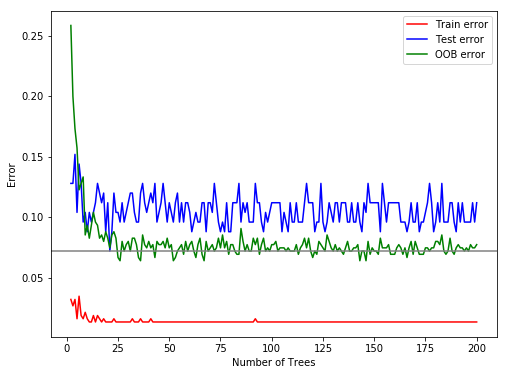

In [60]:
plt.figure(figsize = (8, 6))
plt.plot(range(2, n_estimators + 1), err_rf_train, 'r', label = 'Train error')
plt.plot(range(2, n_estimators + 1), err_rf_test,  'b', label = 'Test error')
plt.plot(range(2, n_estimators + 1), oob_err_rf,  'g', label = 'OOB error')
plt.legend(loc = 1)
plt.axhline(y = min(err_rf_test), color = 'gray')
plt.xlabel('Number of Trees')
plt.ylabel('Error')

Extremely random forest

In [61]:
from sklearn import ensemble
N_estimators = 250
ef_model = ensemble.ExtraTreesClassifier(n_estimators = N_estimators, oob_score=True, bootstrap=True)
ef_model.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=250, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [62]:
err_ef_train = []
err_ef_test  = []
oob_err_ef = []
for n_estimators in range(2, N_estimators + 1):
    ef_model.set_params(n_estimators = n_estimators, warm_start = False)
    ef_model.fit(x_train, y_train)
    err_ef_train.append(np.mean(y_train != ef_model.predict(x_train)))
    err_ef_test.append(np.mean(y_test  != ef_model.predict(x_test)))
    oob_error = 1 - ef_model.oob_score_
    oob_err_ef.append(oob_error)

In [63]:
print(min(err_ef_test), np.argmin(err_ef_test) + 1)
print ("Optimal count of estimators is", np.argmin(err_ef_test) + 1)

0.072 11
Optimal count of estimators is 11


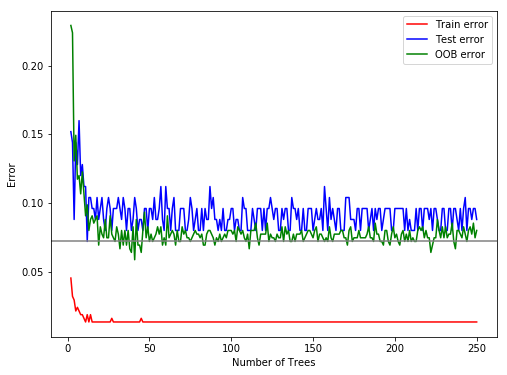

In [64]:
plt.figure(figsize = (8, 6))
plt.plot(range(2, n_estimators + 1), err_ef_train, 'r', label = 'Train error')
plt.plot(range(2, n_estimators + 1), err_ef_test,  'b', label = 'Test error')
plt.plot(range(2, n_estimators + 1), oob_err_ef,  'g', label = 'OOB error')
plt.legend(loc = 1)
plt.axhline(y = min(err_ef_test), color = 'gray')
plt.xlabel('Number of Trees')
plt.ylabel('Error')

AdaBoost

In [65]:
ada_model = ensemble.AdaBoostClassifier(n_estimators = N_estimators)
ada_model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=250, random_state=None)

In [66]:
err_ada_train = []
for y_train_pred in ada_model.staged_predict(x_train):
    err_ada_train.append(np.mean(y_train_pred != y_train))
    
err_ada_test = []
for y_test_pred in ada_model.staged_predict(x_test):
    err_ada_test.append(np.mean(y_test_pred != y_test))

In [67]:
print(min(err_ada_test), np.argmin(err_ada_test) + 1)
print ("Optimal count of estimators is", np.argmin(err_ada_test) + 1)

0.224 234
Optimal count of estimators is 234


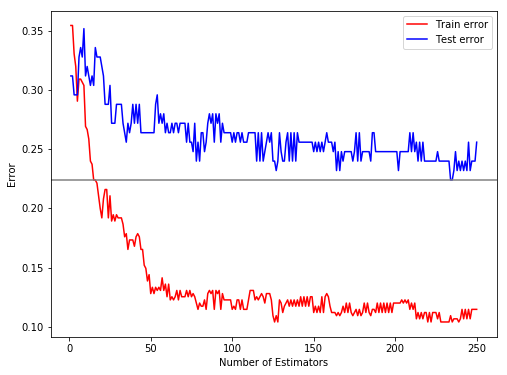

In [68]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, n_estimators + 1), err_ada_train, 'r', label = 'Train error')
plt.plot(range(1, n_estimators + 1), err_ada_test,  'b', label = 'Test error')
plt.legend(loc = 1)
plt.axhline(y = min(err_ada_test), color = 'gray')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')

Gradient boosted trees

In [69]:
n_estimators = 2500 
gbt_model = ensemble.GradientBoostingClassifier(n_estimators = n_estimators)#, max_depth = 1)
gbt_model.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=2500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [70]:
gbt_model.staged_predict(x_train)

<generator object GradientBoostingClassifier.staged_predict at 0x000001F28CFA8D00>

In [71]:
err_gbt_train = []
for y_train_pred in gbt_model.staged_predict(x_train):
    err_gbt_train.append(np.mean(y_train_pred != y_train))
    
err_gbt_test = []
for y_test_pred in gbt_model.staged_predict(x_test):
    err_gbt_test.append(np.mean(y_test_pred != y_test))

In [72]:
print(min(err_gbt_test), np.argmin(err_gbt_test) + 1)

0.088 447


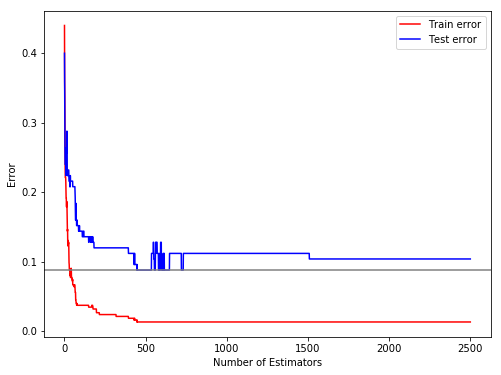

In [73]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, n_estimators + 1), err_gbt_train, 'r', label = 'Train error')
plt.plot(range(1, n_estimators + 1), err_gbt_test,  'b', label = 'Test error')
plt.legend(loc = 1)
plt.axhline(y = min(err_gbt_test), color = 'gray')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')

Conclusion: a trees and ensembles of trees practically is not sensitive to overfitting

PCA

In [74]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 7 ,svd_solver='full')
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [75]:
result=pca.transform(x)

In [76]:
result.shape

(500, 7)

In [77]:
pca.explained_variance_

array([ 0.05642547,  0.04702636,  0.04003683,  0.02529085,  0.01904335,
        0.01021855,  0.00334025])

In [78]:
pca.explained_variance_ratio_

array([ 0.28019169,  0.23351856,  0.19881073,  0.12558666,  0.09456349,
        0.0507422 ,  0.01658668])

In [79]:
pca.components_

array([[ 0.07880669,  0.26383903,  0.20536704,  0.16205542, -0.8879433 ,
         0.13849981,  0.21935221],
       [ 0.16466127,  0.46194447,  0.3648831 ,  0.52988343,  0.42047506,
         0.39767462,  0.10311873],
       [ 0.03977865, -0.21863939, -0.15178862, -0.4128281 ,  0.04268825,
         0.78501039,  0.37293973],
       [-0.08740561, -0.64494548, -0.21113071,  0.69932546, -0.06446714,
         0.06758596,  0.18452488],
       [ 0.06012333,  0.1550113 , -0.10926944, -0.05410486,  0.16285659,
        -0.42891474,  0.86429128],
       [-0.21548284,  0.4757151 , -0.8193826 ,  0.17373963, -0.03964888,
         0.12333531, -0.09436816],
       [ 0.95257883, -0.05389861, -0.27155309,  0.01912205, -0.02616905,
        -0.05180795, -0.11051201]])

In [80]:
arr_comp=[]
pca_global = PCA( n_components = 7 ,svd_solver='full')
pca_global.fit(x)
result_global=pca_global.transform(x)
sum=0.0
for gl in pca_global.explained_variance_:
    sum+=gl

comp_arr = np.arange(2,8)
for opt in comp_arr:
    pca_comp = PCA( n_components = opt ,svd_solver='full')
    pca_comp.fit(x)
    result_comp=pca_comp.transform(x)
    sum_comp=0.0
    for gl in pca_comp.explained_variance_:
        sum_comp+=gl
    if (sum_comp/sum)>0.95: arr_comp.append(opt)

In [81]:
arr_comp

[6, 7]

In [82]:
ncomp_opt=arr_comp[0]

In [83]:
ncomp_opt

6

In [84]:
ncomp_opt=arr_comp[0]
pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
pca_opt.fit(x)
result_opt=pca_opt.transform(x)
X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 22)

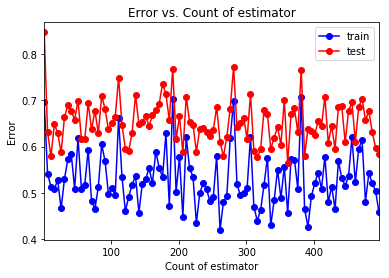

In [85]:
estimator_arr = np.arange(1, 500, 5)
test_err = []
train_err = []
obb_err=[]
for estimator in estimator_arr:
    ab = ensemble.AdaBoostRegressor(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [86]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.419353081264
0.564870104851


In [87]:
trees_opt = estimator_arr[test_err == min_test_err]
print(trees_opt)

[361]


PCA formula page 175

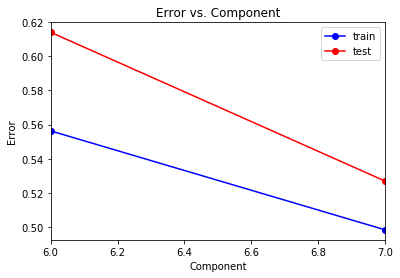

In [93]:
test_err = []
train_err = []
for ncomp_opt in arr_comp:
    pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
    pca_opt.fit(x)
    result_opt=pca_opt.transform(x)
    X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 16)
    ab = ensemble.AdaBoostRegressor(n_estimators = 300)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(arr_comp, train_err, 'b-o', label = 'train')
plt.plot(arr_comp, test_err, 'r-o', label = 'test')
plt.xlim([np.min(arr_comp), np.max(arr_comp)])
plt.title('Error vs. Component')
plt.xlabel('Component')
plt.ylabel('Error')
plt.legend()
pass

In [94]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.498403369489
0.526892311628


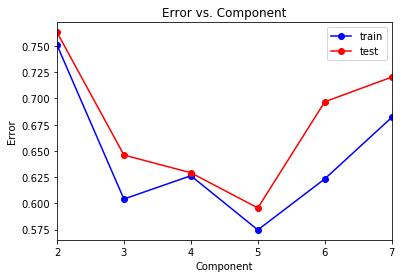

In [90]:
test_err = []
train_err = []
for ncomp_opt in comp_arr:
    pca_opt = PCA( n_components = ncomp_opt ,svd_solver='full')
    pca_opt.fit(x)
    result_opt=pca_opt.transform(x)
    X_train, X_test, y_train, y_test = train_test_split(result_opt, y, test_size = 0.33, random_state = 31)
    ab = ensemble.AdaBoostRegressor(n_estimators = 150)
    ab.fit(X_train, y_train)
    train_err.append(1 - ab.score(X_train, y_train))
    test_err.append(1 - ab.score(X_test, y_test))
plt.plot(comp_arr, train_err, 'b-o', label = 'train')
plt.plot(comp_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(comp_arr), np.max(comp_arr)])
plt.title('Error vs. Component')
plt.xlabel('Component')
plt.ylabel('Error')
plt.legend()
pass

In [91]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.574734170425
0.595654308745


In [92]:
#best amount of pca
print(comp_arr[test_err == min_test_err])

[5]
